# Exploratory Data Analysis and Prediction with Machine Learning

## Intro

Predict whether or not it will rain tomorrow by training a binary classification model on target RainTomorrow

This dataset contains daily weather observations from numerous Australian weather stations.
The target variable RainTomorrow means: Did it rain the next day? Yes or No.

Data source:
https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

Check the link above for details on the data.

In [46]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

import warnings
warnings.filterwarnings("ignore")

## Data Overview

In [6]:
# Import data from weatherAUS.csv
train = pd.read_csv('weatherAUS.csv')

In [7]:
# View training data
train.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


## Data Descriptions

24 columns:

**Date** The date of observation

**Location** The common name of the location of the weather station

**MinTemp** minimum temperature in degrees celsius

**MaxTemp** maximum temperature in degrees celsius

**Rainfall** amount of rainfall recorded for the day in mm

**Evaporation** evaporation (mm) in the 24 hours to 9am

**Sunshine** number of hours of bright sunshine in the day.

**WindGustDir** direction of the strongest wind gust in the 24 hours to midnight

**WindGustSpeed** speed (km/h) of the strongest wind gust 
in the 24 hours to midnight

**WindDir9am** direction of the wind at 9am

**WindDir3pm** direction of the wind at 3pm

**WindSpeed9am** wind speed (km/hr) averaged over 10 minutes prior to 9am

**WindSpeed3pm** wind speed (km/hr) averaged over 10 minutes prior to 3pm

**Humidity9am** humidity (percent) at 9am

**Humidity3pm** humidity (percent) at 3pm

**Pressure9am** atmospheric pressure (hpa) reduced to mean sea level at 9am

**Pressure3pm** atmospheric pressure (hpa) reduced to mean sea level at 3pm

**Cloud9am** fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.

**Cloud3pm** fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values

**Temp9amTemperature** (degrees C) at 9am

**Temp3pmTemperature** (degrees C) at 3pm

**RainToday** Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0

**RISK_MM** amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

**RainTomorrow** target variable. Did it rain tomorrow?

In [8]:
train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


## Data Preproccessing

**Finding holes in the data**

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

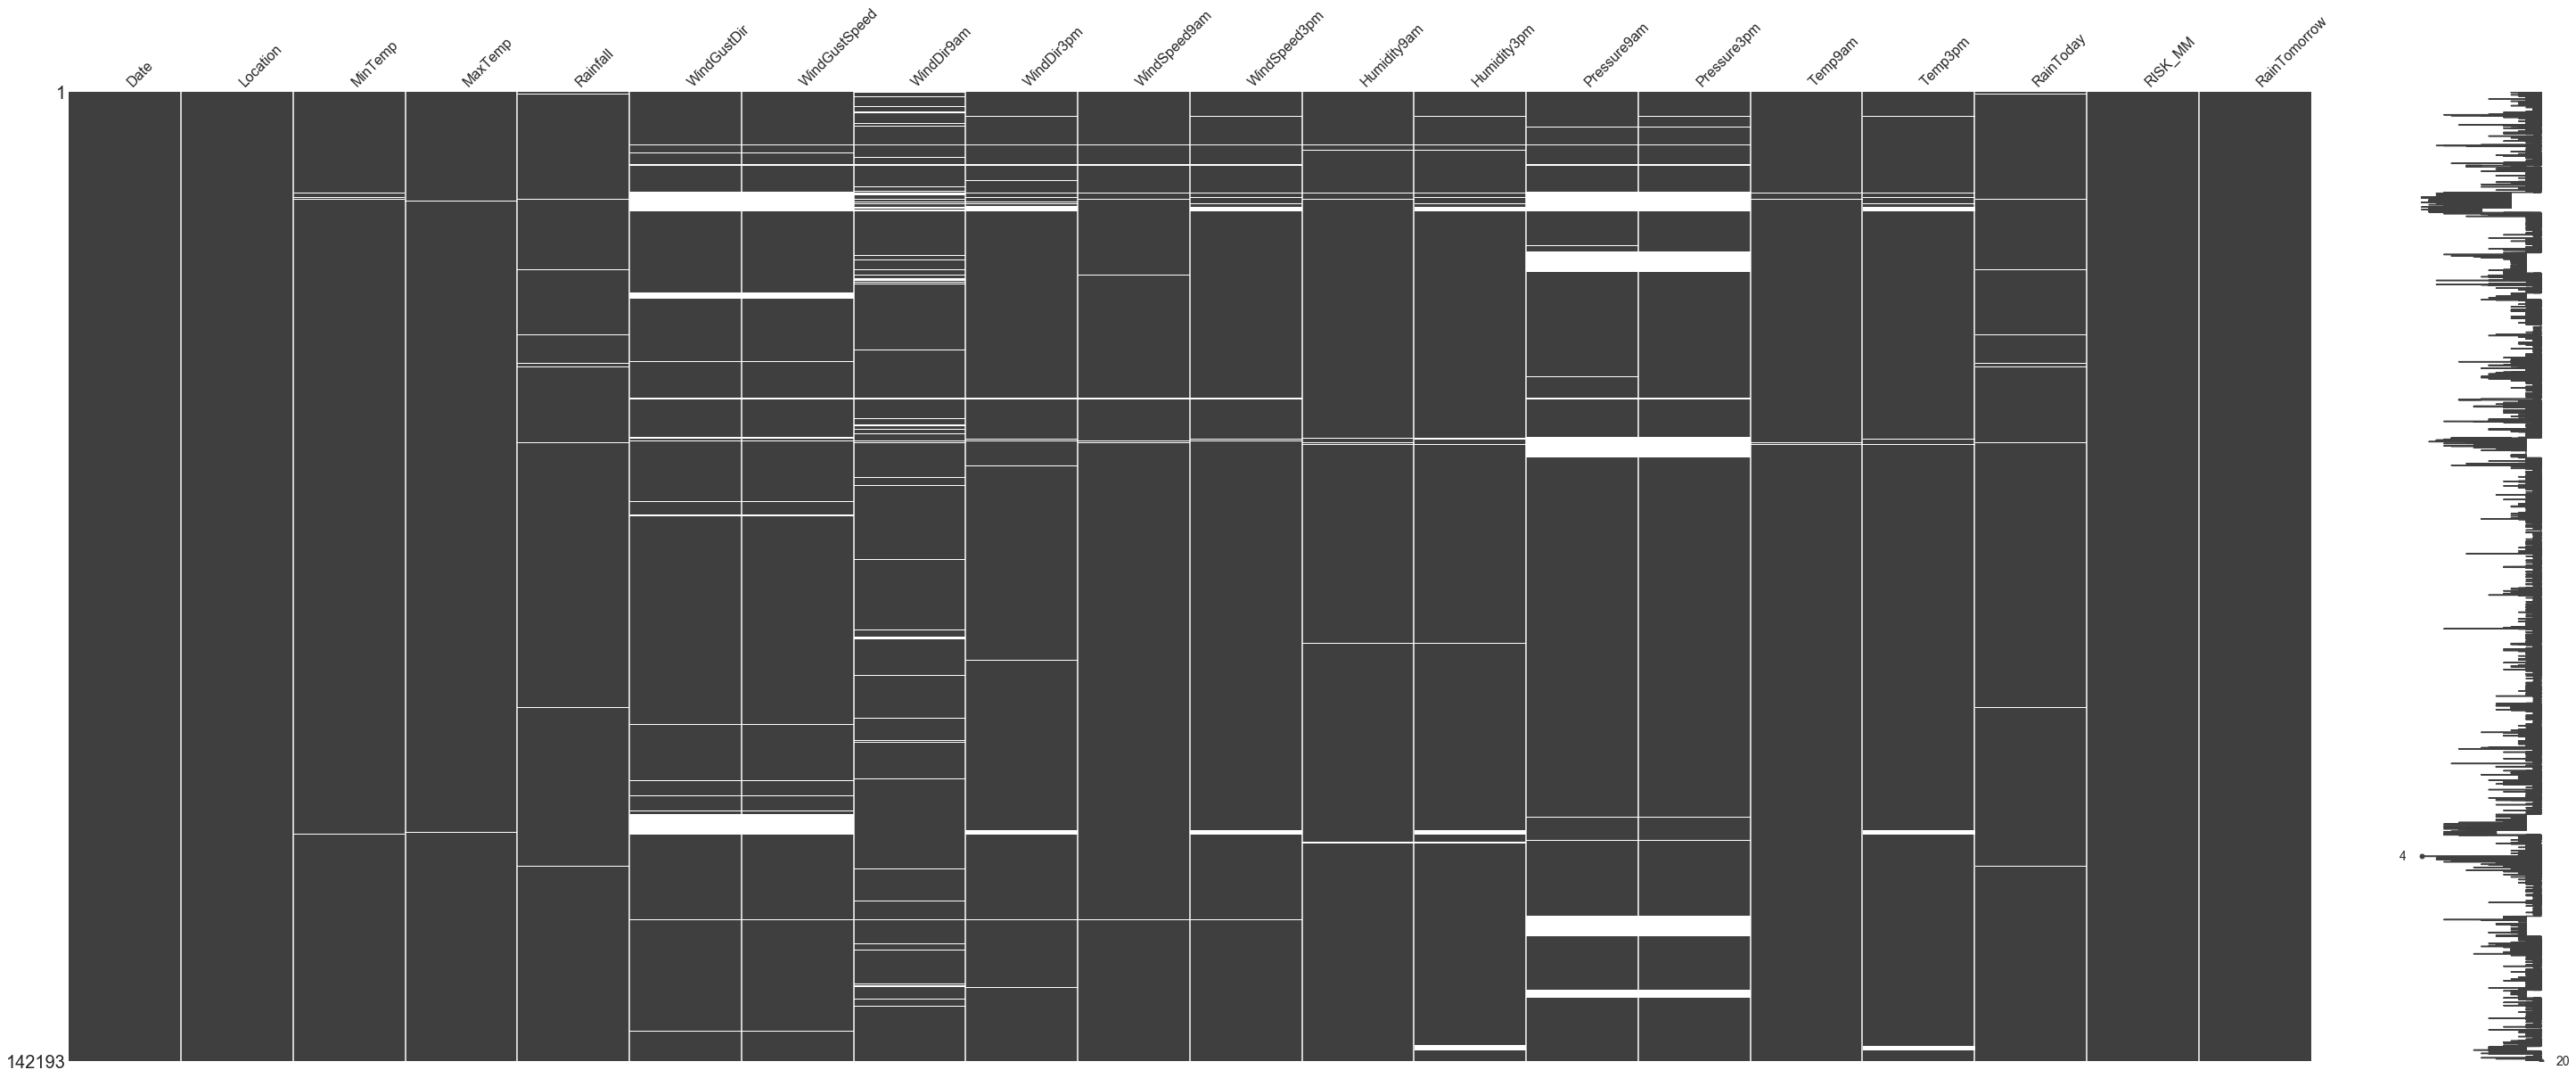

In [17]:
# plot missing values
missingno.matrix(train, figsize = (50, 20))
train.isnull().sum()

The columns Evapouration, Sunshine, Cloud9am and Cloud3pm are missing several values; we omit them for the next steps

In [16]:
# drop columns
train = train.drop(['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'], axis = 1)

**Change obeject types into integers**

In [21]:
# Get data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 20 columns):
Date             142193 non-null object
Location         142193 non-null object
MinTemp          141556 non-null float64
MaxTemp          141871 non-null float64
Rainfall         140787 non-null float64
WindGustDir      132863 non-null object
WindGustSpeed    132923 non-null float64
WindDir9am       132180 non-null object
WindDir3pm       138415 non-null object
WindSpeed9am     140845 non-null float64
WindSpeed3pm     139563 non-null float64
Humidity9am      140419 non-null float64
Humidity3pm      138583 non-null float64
Pressure9am      128179 non-null float64
Pressure3pm      128212 non-null float64
Temp9am          141289 non-null float64
Temp3pm          139467 non-null float64
RainToday        140787 non-null object
RISK_MM          142193 non-null float64
RainTomorrow     142193 non-null object
dtypes: float64(13), object(7)
memory usage: 21.7+ MB


In [22]:
'''Change date to month'''
train['Date'] = pd.to_datetime(train['Date']).dt.month
train.rename(columns={'Date':'Month'}, inplace=True)

In [24]:
'''Change RainToday and RainTommorrow; No = 0, Yes: 1'''
train['RainToday'] = train['RainToday'].map( {'No':0, 'Yes':1} ) 
train['RainTomorrow'] = train['RainTomorrow'].map( {'No':0, 'Yes': 1} )

Next columns Location, WindGustDir, WindDir9am, WindDir3pm are all categorical variables that need to be transformed into numerical variables

In [26]:
# Transform categorical vars to num
objs = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
for column in objs:
    l = train[column].value_counts().index.tolist() 
    mapping = {x:y for x,y in zip(l, range(len(l)))}
    train[column] = train[column].map(mapping) 

In [28]:
train.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,12,14,13.4,22.9,0.6,0.0,44.0,6.0,7.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,0
1,12,14,7.4,25.1,0.0,9.0,44.0,9.0,3.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,0
2,12,14,12.9,25.7,0.0,6.0,46.0,6.0,3.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,0
3,12,14,9.2,28.0,0.0,13.0,24.0,1.0,10.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,1.0,0
4,12,14,17.5,32.3,1.0,0.0,41.0,10.0,8.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.2,0


**Filling in the missing data**

For the purposes of removing holes from data, we will use the mean value for each columns to fill in the missing data

In [31]:
columns_NaN = train.columns[train.isnull().any()]
columns_NaN

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir', 'WindGustSpeed',
       'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [32]:
for column in columns_NaN:
    train[column].fillna(train[column].mean(), inplace=True)

In [33]:
train.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

**Correlation between variables**

Check for strong correlations between vars and remove highly correlated vars

In [34]:
train.corr()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
Month,1.000000,-0.008826,-0.203826,-0.164435,-0.030710,0.025963,0.058868,0.015939,0.014406,0.050776,0.060405,-0.090079,-0.018315,0.034677,0.025706,-0.136184,-0.173949,0.009842,-0.032250,0.007328
Location,-0.008826,1.000000,-0.014080,0.005341,0.009457,-0.025211,0.029222,0.021929,-0.045956,0.046656,-0.011546,0.046733,0.046975,0.033690,0.030544,-0.000951,-0.010999,0.010042,0.010843,0.012430
MinTemp,-0.203826,-0.014080,1.000000,0.733919,0.103314,0.029448,0.173331,-0.048744,0.070520,0.174946,0.174187,-0.232372,0.005913,-0.424357,-0.434034,0.897999,0.699828,0.055856,0.123928,0.083717
MaxTemp,-0.164435,0.005341,0.733919,1.000000,-0.074202,0.059966,0.066329,-0.081667,0.118651,0.014586,0.050381,-0.499777,-0.499725,-0.309093,-0.397422,0.880087,0.969735,-0.227421,-0.044154,-0.159087
Rainfall,-0.030710,0.009457,0.103314,-0.074202,1.000000,-0.023757,0.127250,0.026732,-0.034609,0.085977,0.056762,0.221392,0.249609,-0.159676,-0.120366,0.011384,-0.077553,0.500997,0.301844,0.236874
WindGustDir,0.025963,-0.025211,0.029448,0.059966,-0.023757,1.000000,-0.065242,0.033775,0.287472,-0.081616,-0.036896,0.001145,0.009508,-0.004926,-0.050587,0.051614,0.063004,-0.046885,0.008028,0.004768
WindGustSpeed,0.058868,0.029222,0.173331,0.066329,0.127250,-0.065242,1.000000,-0.028396,-0.086710,0.577864,0.658377,-0.209272,-0.025822,-0.426600,-0.384642,0.146756,0.032274,0.148977,0.156620,0.225264
WindDir9am,0.015939,0.021929,-0.048744,-0.081667,0.026732,0.033775,-0.028396,1.000000,-0.021993,-0.049530,-0.032410,0.041848,0.038164,-0.002440,0.025488,-0.064820,-0.082025,0.055150,-0.001365,0.006570
WindDir3pm,0.014406,-0.045956,0.070520,0.118651,-0.034609,0.287472,-0.086710,-0.021993,1.000000,-0.080018,-0.075983,-0.003527,-0.008972,0.032080,-0.044529,0.094163,0.128429,-0.083515,0.018381,0.001197
WindSpeed9am,0.050776,0.046656,0.174946,0.014586,0.085977,-0.081616,0.577864,-0.049530,-0.080018,1.000000,0.513079,-0.269027,-0.030991,-0.215178,-0.165050,0.128769,0.005026,0.101399,0.068828,0.090524


Strong correlation between Temp9am and MinTemp, Pressure3pm and Pressure9am, and Temp3pm and MaxTemp

Remove Temp9am, Temp3am and Pressure3pm

In [39]:
train = train.drop(['Temp3pm', 'Temp9am', 'Pressure3pm'], axis=1)

## Building Machine Learning Models

**Seperate data**

1- Remove RISK_MM as it contains info for rain the following day

2- Split dataframe into data and labels

In [41]:
x_train = train.drop(['RISK_MM', 'RainTomorrow'], axis=1) # data
y_train = train.RainTomorrow #labels, target feature
x_train.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,RainToday
0,12,14,13.4,22.9,0.6,0.0,44.0,6.0,7.0,20.0,24.0,71.0,22.0,1007.7,0.0
1,12,14,7.4,25.1,0.0,9.0,44.0,9.0,3.0,4.0,22.0,44.0,25.0,1010.6,0.0
2,12,14,12.9,25.7,0.0,6.0,46.0,6.0,3.0,19.0,26.0,38.0,30.0,1007.6,0.0
3,12,14,9.2,28.0,0.0,13.0,24.0,1.0,10.0,11.0,9.0,45.0,16.0,1017.6,0.0
4,12,14,17.5,32.3,1.0,0.0,41.0,10.0,8.0,7.0,20.0,82.0,33.0,1010.8,0.0


**Fucntion to fit machine learning algorithms**

In [44]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, x_train, y_train, cv):
    
    model = algo.fit(x_train, y_train)
    acc = round(model.score(x_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  x_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

**Logistic Regression**

In [47]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               x_train, 
                                                               y_train, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 83.72
Accuracy CV 10-Fold: 83.47
Running Time: 0:00:12.208858


**Gaussian Naive Bayes**

In [50]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      x_train, 
                                                                      y_train, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 80.67
Accuracy CV 10-Fold: 80.54
Running Time: 0:00:04.707403


**Linear Support Vector Machines**

In [57]:
# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                x_train, 
                                                                y_train, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 41.62
Accuracy CV 10-Fold: 71.47
Running Time: 0:03:15.900472


**Stochastic Gradient Descent**

In [52]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  x_train, 
                                                  y_train,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 79.51
Accuracy CV 10-Fold: 77.65
Running Time: 0:01:03.454017


**Decision Tree Classifier**

In [54]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                x_train, 
                                                                y_train,
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 100.0
Accuracy CV 10-Fold: 74.33
Running Time: 0:00:07.971718


**Gradient Boost Trees**

In [55]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       x_train, 
                                                                       y_train,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

Accuracy: 84.73
Accuracy CV 10-Fold: 83.42
Running Time: 0:02:15.636193


# Summary and Results

**Regular Accuracy Scores**

In [64]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [ 
        acc_log,
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt
    ]})
print("---Reuglar Accuracy Scores---")
models.sort_values(by='Score', ascending=False)

---Reuglar Accuracy Scores---


,Model,Score
4,Decision Tree,100.00
5,Gradient Boosting Trees,84.73
0,Logistic Regression,83.72
1,Naive Bayes,80.67
2,Stochastic Gradient Decent,79.51
3,Linear SVC,41.62


In [65]:
cv_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_cv_log,      
        acc_cv_gaussian, 
        acc_cv_sgd, 
        acc_cv_linear_svc, 
        acc_cv_dt,
        acc_cv_gbt
    ]})
print('---Cross-validation Accuracy Scores---')
cv_models.sort_values(by='Score', ascending=False)

---Cross-validation Accuracy Scores---


,Model,Score
0,Logistic Regression,83.47
5,Gradient Boosting Trees,83.42
1,Naive Bayes,80.54
2,Stochastic Gradient Decent,77.65
4,Decision Tree,74.33
3,Linear SVC,71.47


We can see from the tables, the Gradient Boosting Trees model had the best results about 84%.